In [10]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import glob
from pandas import DataFrame as df
import numpy as np
import datetime

In [0]:
start=datetime.datetime.now()

In [13]:
items=glob.glob('/gdrive/My Drive/Capstone project images/segmented/Grape*/*.jpg',recursive=True)
data=df(columns=['Item'],data=items)
data['Folder']=data['Item'].str.rsplit('/', 1, expand=True)[0]
data['Folder']=data['Folder'].str.rsplit('/', 1, expand=True)[1]
data['Species']=data['Folder'].str.rsplit('___', 1, expand=True)[0]
data['Disease']=data['Folder'].str.rsplit('___', 1, expand=True)[1]
data['Image Path']=data['Item']#.str.rsplit('\\', 1, expand=True)[1]
data.drop(['Species','Item','Folder'],axis=1,inplace=True)
data.head()

,Disease,Image Path
0,healthy,/gdrive/My Drive/Capstone project images/segme...
1,healthy,/gdrive/My Drive/Capstone project images/segme...
2,healthy,/gdrive/My Drive/Capstone project images/segme...
3,healthy,/gdrive/My Drive/Capstone project images/segme...
4,healthy,/gdrive/My Drive/Capstone project images/segme...


In [0]:
X=data.drop(['Disease'],axis=1)
y=data['Disease']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [0]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [0]:
img_train=[]
for image in X_train['Image Path']:
    img_train.append(cv2.imread(image,1))

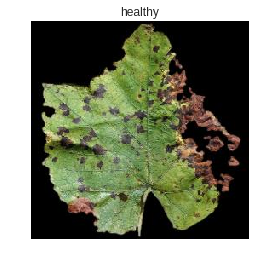

In [18]:
imgplot=plt.imshow(cv2.cvtColor(img_train[0], cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title(y_train[0])
plt.show()

In [0]:
img_test=[]
for image in X_test['Image Path']:
    img_test.append(cv2.imread(image,1))

Text(0.5, 1.0, 'Black_rot')

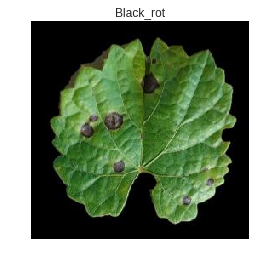

In [20]:
imgplot=plt.imshow(cv2.cvtColor(img_test[0], cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title(y_test.iloc[0])

In [0]:
img_train=np.array(img_train)
img_test=np.array(img_test)

In [22]:
train=img_train
train.shape

(2722, 256, 256, 3)

In [23]:
train.resize(train.shape[0],train.shape[1]*train.shape[2]*train.shape[3])
train.shape

(2722, 196608)

In [24]:
test=img_test
test.shape

(1341, 256, 256, 3)

In [25]:
test.resize(test.shape[0],test.shape[1]*test.shape[2]*test.shape[3])
test.shape

(1341, 196608)

In [0]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [0]:
lr=LogisticRegression(class_weight='balanced')

In [28]:
lr.fit(train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [0]:
preds=lr.predict(test)

In [30]:
preds[0]

'healthy'

In [0]:
import pickle
pickle.dump(lr, open('/gdrive/My Drive/Capstone project images/Logistic_Regression_Baseline_Segmented_Colab.sav', 'wb'))

In [0]:
from sklearn.metrics import confusion_matrix,classification_report

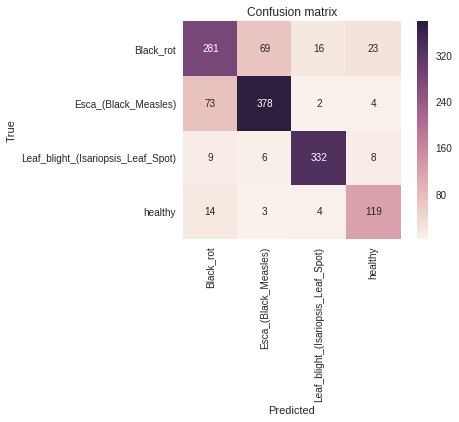

In [33]:
import seaborn as sns
label=['Black_rot','Esca_(Black_Measles)','Leaf_blight_(Isariopsis_Leaf_Spot)','healthy']
sns.heatmap(confusion_matrix(y_test,preds),annot=True,square=True,fmt='g',xticklabels=label,yticklabels=label)
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [34]:
print(classification_report(preds,y_test))

                                    precision    recall  f1-score   support

                         Black_rot       0.72      0.75      0.73       377
              Esca_(Black_Measles)       0.83      0.83      0.83       456
Leaf_blight_(Isariopsis_Leaf_Spot)       0.94      0.94      0.94       354
                           healthy       0.85      0.77      0.81       154

                         micro avg       0.83      0.83      0.83      1341
                         macro avg       0.83      0.82      0.83      1341
                      weighted avg       0.83      0.83      0.83      1341



In [35]:
print(datetime.datetime.now()-start)

0:39:46.223703
